# Admisson Prediction

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Admission_Predict.csv')
data.drop('Serial No.',axis = 1,inplace = True)
df = data.to_numpy(dtype = 'float32')
x_all = df[:,:7]
x_all = np.append(x_all,np.ones([x_all.shape[0],1]),axis =1)
y_all = df[:,-1]
x_train = x_all[:280,:]
y_train = y_all[:280]
x_test = x_all[280:,:]
y_test = y_all[280:]

In [3]:
def getHypothesis(x,w):
    return np.dot(w,x.T)

In [4]:
def getLoss(x,y,w):
    h_theta = getHypothesis(x,w)
    loss = (1/2)*((h_theta - y)**2)
    grad = np.dot((h_theta -y).T,x) 
    return loss, grad

In [5]:
weights = np.zeros([x_train.shape[1]])
# np.dot(weights,x_all.T) - y_all
iterations =1000
learning_rate = 1e-10
losses = []
for i  in tqdm(range(iterations)):
    loss, grad = getLoss(x_train,y_train,weights)
    weights = weights - learning_rate*(grad)
    losses.append(np.sum(loss)/len(loss))
print (np.sum(loss)/len(loss))

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 7176.02it/s]

0.008088041010203113


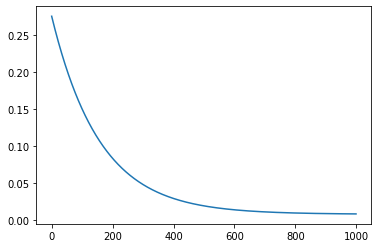

In [6]:
plt.plot(losses)

In [7]:
def getAccuracy(x,y,w):
    h_theta = getHypothesis(x,w)
    err = (h_theta - y)/y
    accuracy = 1-(np.sum(err)/len(err))
    return accuracy

In [8]:
print("Training Accuracy: ",getAccuracy(x_train,y_train,weights))
print("Testing Accuracy: ",getAccuracy(x_test,y_test,weights))

Training Accuracy:  0.9990455528868389
Testing Accuracy:  0.9874105508974729


In [9]:
def predict(x):
    x = np.append(x,np.array(1))
    return np.dot(weights,x)